In [1]:
# Import the necessary libraries
import pandas as pd
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


In [2]:
# Read the file 'backprop.csv'
df = pd.read_csv('backprop.csv')

In [3]:
# Take a quick look at your dataset

df.head()

,x,y
0,-5.00000,0.006693
1,-4.98999,0.006760
2,-4.97998,0.006827
3,-4.96997,0.006895
4,-4.95996,0.006964


In [4]:
# Assign the predictor and response data values to x and y variable
x = df['x']
y = df['y']

x = df.x.values.reshape(-1,1)
y = df.y.values.reshape(-1,1)

In [5]:
np.random.seed(310)

# W is a list that contains from w1 to w6
# W = [w1,w2,w3,w4,w5,w6]
W = np.array([np.random.randn(1, 1), np.random.randn(1, 1),
    np.random.randn(1, 1), np.random.randn(1, 1),
    np.random.randn(1, 1), np.random.randn(1, 1)]).reshape(-1,1)


# Define the neural network model given by the figure in the instructions
model = keras.Sequential()
model.add(tf.keras.layers.Dense(3, activation= tf.sin, input_shape=(x.shape[1],)))
model.add(tf.keras.layers.Dense(1))  # Output layer for regression
# Take a look at the model summary
model.summary()
model.get_weights()

f:\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

[array([[ 0.6208341 ,  0.8651656 , -0.14726269]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 1.1140991 ],
        [-0.0435915 ],
        [ 0.35866165]], dtype=float32),
 array([0.], dtype=float32)]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step


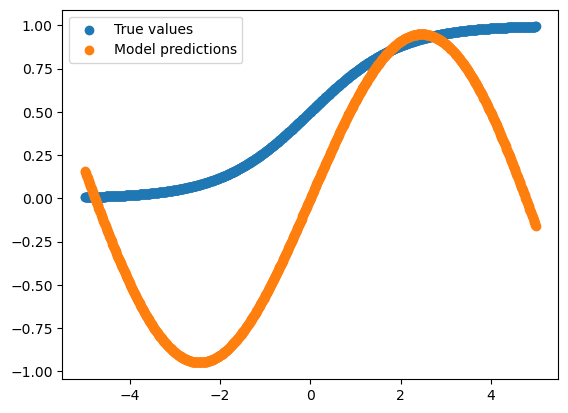

In [6]:
# Plot the true data and the predictions of your neural network
initial_predictions = model.predict(x)

plt.scatter(x, y, label='True values')
plt.scatter(x, model.predict(x), label='Model predictions')
plt.legend()
plt.show()

In [7]:
## Using Backpropagation to find the gradients and update
## Remember to use gradient tape 

# Your code here 

# Define the loss function
loss_fn = tf.keras.losses.MeanSquaredError()
# Set a small learning rate
learning_rate = 0.01

# Store the loss values
loss_values = []

# Training loop
for epoch in range(1000):
    with tf.GradientTape() as tape:
        # Forward pass: compute predictions
        predictions = model(x, training=True)
        
        # Compute the loss
        loss = loss_fn(y, predictions)
    
    # Compute gradients
    gradients = tape.gradient(loss, model.trainable_variables)
    
    # Update weights
    current_weights = model.get_weights()
    updated_weights = []
    for i in range(len(current_weights)): 
        updated_weight = current_weights[i] - learning_rate * gradients[i]
        updated_weights.append(updated_weight)
    model.set_weights(updated_weights)
    
    # Store the loss value
    loss_values.append(loss.numpy())
if loss_values[-1] < 0.001:
    print("Loss has reduced to below 0.001")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step


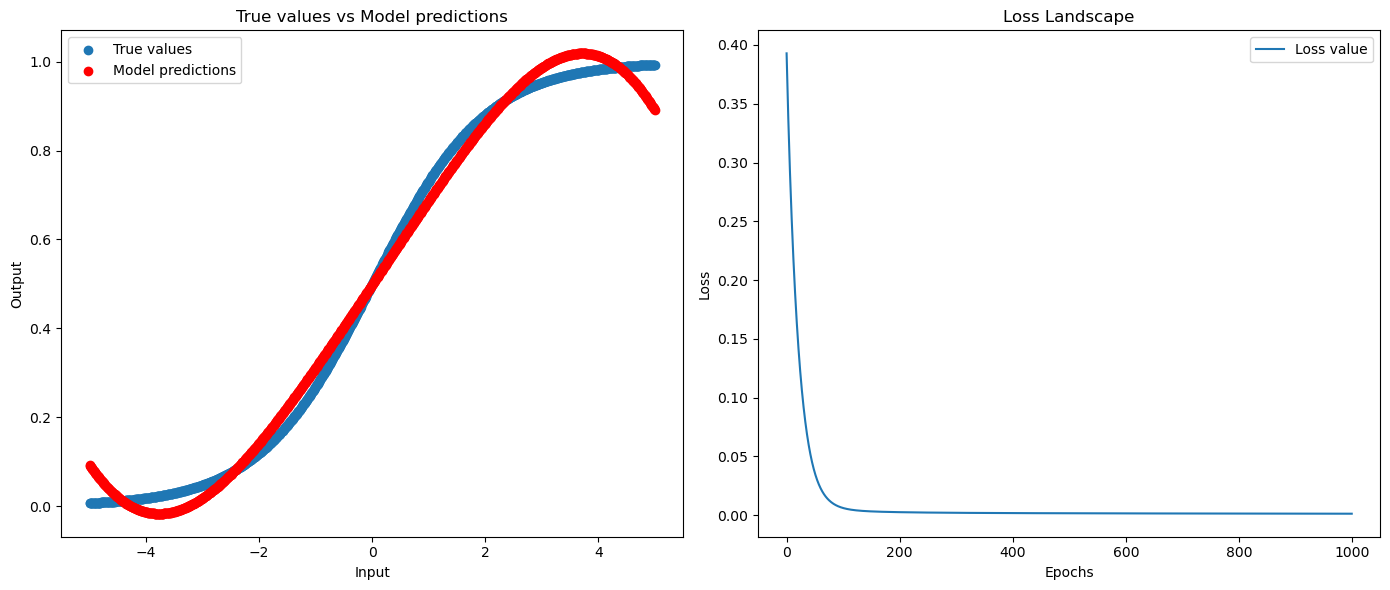

In [8]:
# Plot the neural network predictions, 
# and the loss landscape

# Your code here
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, y, label='True values')
plt.scatter(x, model.predict(x), label='Model predictions', color='red')
plt.title('True values vs Model predictions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()

# Plotting Loss Landscape
plt.subplot(1, 2, 2)
plt.plot(loss_values, label='Loss value')
plt.title('Loss Landscape')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()